Criterios para la Selección de Proyectos Individuales
===

Notas de clase sobre ingeniería economica avanzada usando Python

**Juan David Velásquez Henao**  
jdvelasq@unal.edu.co   
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia  

**Software utilizado**
>Este es un documento interactivo escrito como un notebook de [Jupyter](http://jupyter.org/) , en el cual se presenta un tutorial sobre finanzas corporativas usando Python. Los notebooks de Jupyter permiten incoporar simultáneamente código, texto, gráficos y ecuaciones. El código presentado en este notebook puede ejecutarse en los sistemas operativos Linux y OS X.  

>Haga click [aquí](https://github.com/jdvelasq/guias-de-instalacion) para obtener instrucciones detalladas sobre como instalar Jupyter en Windows y Mac OS X.

>Descargue la última versión de este documento a su disco duro; luego, carguelo y ejecutelo en línea en Try [Jupyter!](https://try.jupyter.org/)



#### Contenido

>

**Bibliografía**

> * [1] SAS/ETS 14.1 User's Guide, 2015.   
* [2] **hp** 12c platinum financial calculator. User's guide. 
* [3] HP Business Consultant II Owner's manual.
* [4] C.S. Park and G.P. Sharp-Bette. Advanced Engineering Economics. John Wiley & Sons, Inc., 1990.

# Criterios para la selección de proyectos individuales

## Criterio del valor presente neto 

<img src="images/vpn.png" width=850>

**Criterio del valor presente.**

$$PV(r) = \sum_{t=0}^N \frac{F_t}{(1+r)^t}$$

* Si $PV(r) > 0$, acepte.

* Si $PV(r) = 0$, indiferencia.

* Si $PV(r) < 0$, rechace.

**Criterio del valor futuro.**

$$FV(r) = \sum_{t=0}^N \frac{F_t}{(1+r)^{N-t}}$$

* Si $FV(r) > 0$, acepte.

* Si $FV(r) = 0$, indiferencia.

* Si $FV(r) < 0$, rechace.

**Criterio del equivalente uniforme periodico.**

$$UPE(r) = PV(r) * \frac{r * (1+r)^N}{(1+r)^N-1}$$

* Si $UPE(r) > 0$, acepte.

* Si $UPE(r) = 0$, indiferencia.

* Si $UPE(r) < 0$, rechace.

**Nota 1.** $r$ es la MARR y puede variar de periodo a periodo

**Nota 2.** El $PV(r)$ representa el excedente que se gana sobre la alternativa de invertir a una tasa de $r$.

**Ejemplo.--** Calcule los indicadores para el siguiente flujo de efectivo, si la tasa de descuento es del 10%.

<img src="images/diagrama-vpn.png" width=550>

In [1]:
import cashflows as cf

In [2]:
cflo = cf.cashflow(const_value= 0,nper=6, spec = [(0, -1000),
                                                  (1,   400),
                                                  (2,   360),
                                                  (3,   320),
                                                  (4,   280),
                                                  (5,   240)])
cflo

Time Series:
Start = (0,)
End = (5,)
pyr = 1
Data = (0,)   -1000.00 
       (1,)     400.00 
       (2,)     360.00 
       (3,)     320.00 
       (4,)     280.00 
       (5,)     240.00 

In [3]:
cf.timevalue(cflo  = cflo,
              marr = cf.nominal_rate([10]*6)  )

241.84264611831009

In [4]:
cf.timevalue(cflo  = cflo,
              marr = cf.nominal_rate([10]*6),
              base_date = 5  )

389.4900000000001

In [5]:
## la función npv puede recibir simultaneamente varios flujos de efectivo
cf.timevalue(cflo  = [cflo,cflo,cflo],
              marr = cf.nominal_rate([10]*6))

[241.84264611831009, 241.84264611831009, 241.84264611831009]

In [6]:
# o varias tasas de interes
marr1 = cf.nominal_rate([10]*6)
marr2 = cf.nominal_rate([20]*6)
marr3 = cf.nominal_rate([30]*6)

cf.timevalue(cflo  = cflo,
              marr = [marr1, marr2, marr3])

[241.84264611831009, 1.2789769243681803e-13, -170.96201652064556]

In [7]:
## o una tasa de descuento para cada flujo de efectivo
marr1 = cf.nominal_rate([10]*6)
marr2 = cf.nominal_rate([20]*6)
marr3 = cf.nominal_rate([30]*6)

cf.timevalue(cflo  = [cflo, cflo, cflo],
              marr = [marr1, marr2, marr3])

[241.84264611831009, 1.2789769243681803e-13, -170.96201652064556]

## Criterio de la tasa interna de retorno

**Tasa Interna de Retorno (IRR)**.

$r^*$ -- tasa interna de retorno (irr). Es la tasa que hace el valor presente igual a cero.

$$PV(r^*) = \sum_{t=0}^N \frac{F_t}{(1+r^*)^t} ~=~0$$

**Ejemplo.--** Calcule la irr para el ejemplo anterior.

In [8]:
cf.irr(cflo)

20.000000000000018

**Tasa Interna de Retorno Modificada**.

<img src="images/mirr.png" width=650>

$$(1+MIRR)^N = \frac{\sum_{t=0}^N \max(F_t,0) * (1+r_1)^{N-t} }{ \sum_{t=0}^N \min(F_t,0) * (1+r_2)^{-t} }$$

$r_1$ -- tasa de reinversión.   
$r_2$ -- tasa de financiamiento.

In [9]:
cf.mirr(cflo=cflo, finance_rate=0, reinvest_rate=0)

9.8560543306117854

In [10]:
## la función puede recibir varios flujos de fondos simulataneamente.
cf.irr([cflo, cflo, cflo])

[20.000000000000018, 20.000000000000018, 20.000000000000018]

# Análisis de sensibilidad

Se realiza variando una de las variables del problema para determinar el efecto en el indicador utilizado.

**Ejemplo.--** Se tiene un proyecto con la siguiente información:

* Años de operación: 10

* Años de construcción: 1

* Producción: 1000 unidades por año

* Precio de venta: \$ 10 por unidad

* Costos operativos: \$ 220 por año

* Costos de inversión: \$ 2000 depreciables a 10 años.

* MARR = 10%

* Impuesto de renta: 30%

Construya la gráfica de sensibilidad del npv a la producción, el precio de venta y la inversión.

In [11]:
## se construye una función que recibe la información relevante y retorn el npv

def project(marr,
            produccion, 
            precio, 
            costo,
            inversion):
    
    ingre = cf.cashflow(const_value=0, 
                        nper=11, 
                        spec = [(t, precio * produccion) if t > 0 else (0,0) for t in range(11)]) 
    
    opera = cf.cashflow(const_value=0, 
                        nper=11, 
                        spec = [(t, costo)               if t > 0 else (0,0) for t in range(11)])
    
    inver = cf.cashflow(const_value=0, 
                        nper=11, 
                        spec = (0, inversion))
    
    dep   = cf.depreciation_sl(costs = cf.cashflow(const_value=0, nper=11, spec=(0, inversion)),
                               life  = cf.cashflow(const_value=0, nper=11, spec=(0, 10)),
                               noprint = True)
                               
                        
   
    antes = ingre - opera - inver - dep
    
    desp  = cf.after_tax_cashflow(antes, 
                                  tax_rate = cf.nominal_rate(const_value=[30] * 11))
    
    neto  = antes + desp
    
    npv   = cf.timevalue(cflo  = neto,
                          marr = cf.nominal_rate([marr]*11))
    
    return npv

In [12]:
project(10, 100, 10, 220, 2000)

2633.0035977013285

In [13]:
## resultados para diferentes valores de la MARR
x=[]
for i in [8, 10, 12]:
    x.append(project( i, 100, 10, 220, 2000))
x

[3059.4013748018465, 2633.0035977013285, 2260.2681634217906]

In [14]:
## resultados para diferentes valores de la inversión
[project(10, 100, 10, 220, x) for x in [1600, 1800, 2000, 2200, 2400]]

[3352.521087197972,
 2992.7623424496505,
 2633.0035977013285,
 2273.244852953007,
 1913.486108204685]

In [15]:
## resultados para diferentes valores del precio
[project(10, 100, x, 220, 2000) for x in [8, 9, 10, 11, 12]]

[1035.4161502181119,
 1834.2098739597204,
 2633.0035977013285,
 3431.797321442937,
 4230.591045184545]

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
precio = [8, 9, 10, 11, 12]
y = [project(0.10, 100, x, 220, 2000) for x in precio]

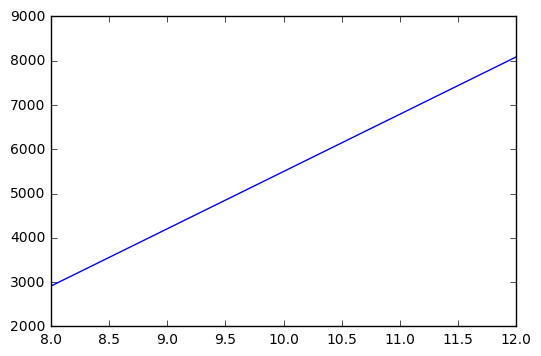

In [18]:
plt.plot(precio, y)

---

**Ejercicio.--** Haga sensibilidades al costo y a la producción, y grafíquelas.

---

[Contenido](#Contenido)